<a href="https://colab.research.google.com/github/jacktitus/ML1/blob/main/mobile_price_prediction_ml_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd


In [ ]:
train_df = pd.read_csv('/content/train.csv')
test_df = pd.read_csv('/content/test.csv')

print("Train dataset shape:", train_df.shape)
print("Test dataset shape:", test_df.shape)

display(train_df.head())
display(test_df.head())

Train dataset shape: (2000, 21)
Test dataset shape: (1000, 21)


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


In [ ]:
print("Train dataset info:")
train_df.info()

print("\nTest dataset info:")
test_df.info()

Train dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   i

In [ ]:
print("Missing values in train dataset:")
print(train_df.isnull().sum())

print("\nMissing values in test dataset:")
print(test_df.isnull().sum())

Missing values in train dataset:
battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

Missing values in test dataset:
id               0
battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
dtype: int64


In [ ]:
print("Train dataset description:")
display(train_df.describe())

print("\nTest dataset description:")
display(test_df.describe())

Train dataset description:


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000



Test dataset description:


,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,500.500000,1248.510000,0.516000,1.540900,0.517000,4.593000,0.487000,33.652000,0.517500,139.51100,...,10.054000,627.121000,1239.774000,2138.998000,11.995000,5.316000,11.085000,0.756000,0.50000,0.507000
std,288.819436,432.458227,0.499994,0.829268,0.499961,4.463325,0.500081,18.128694,0.280861,34.85155,...,6.095099,432.929699,439.670981,1088.092278,4.320607,4.240062,5.497636,0.429708,0.50025,0.500201
min,1.000000,500.000000,0.000000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.00000,...,0.000000,0.000000,501.000000,263.000000,5.000000,0.000000,2.000000,0.000000,0.00000,0.000000
25%,250.750000,895.000000,0.000000,0.700000,0.000000,1.000000,0.000000,18.000000,0.300000,109.75000,...,5.000000,263.750000,831.750000,1237.250000,8.000000,2.000000,6.750000,1.000000,0.00000,0.000000
50%,500.500000,1246.500000,1.000000,1.500000,1.000000,3.000000,0.000000,34.500000,0.500000,139.00000,...,10.000000,564.500000,1250.000000,2153.500000,12.000000,5.000000,11.000000,1.000000,0.50000,1.000000
75%,750.250000,1629.250000,1.000000,2.300000,1.000000,7.000000,1.000000,49.000000,0.800000,170.00000,...,16.000000,903.000000,1637.750000,3065.500000,16.000000,8.000000,16.000000,1.000000,1.00000,1.000000
max,1000.000000,1999.000000,1.000000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.00000,...,20.000000,1907.000000,1998.000000,3989.000000,19.000000,18.000000,20.000000,1.000000,1.00000,1.000000


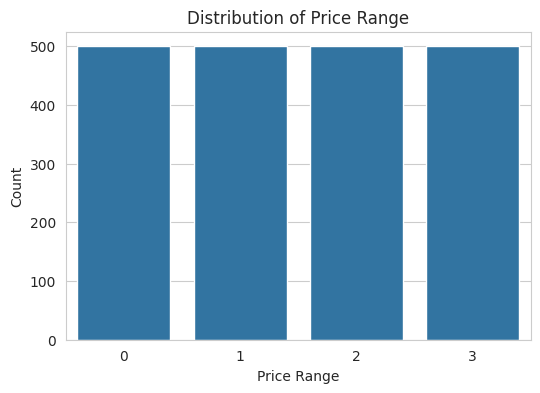

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plots
sns.set_style('whitegrid')

# Analyze the distribution of the target variable
plt.figure(figsize=(6, 4))
sns.countplot(x='price_range', data=train_df)
plt.title('Distribution of Price Range')
plt.xlabel('Price Range')
plt.ylabel('Count')
plt.show()

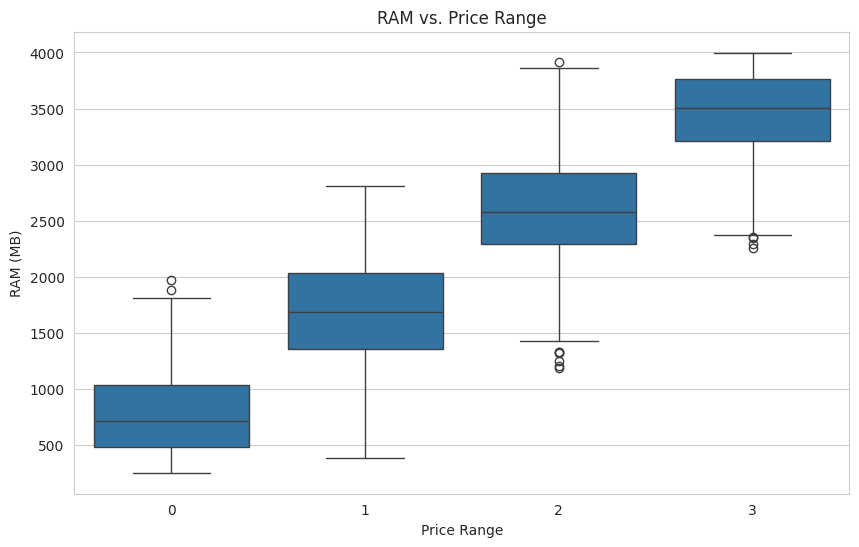

In [ ]:
# Analyze the relationship between RAM and price range
plt.figure(figsize=(10, 6))
sns.boxplot(x='price_range', y='ram', data=train_df)
plt.title('RAM vs. Price Range')
plt.xlabel('Price Range')
plt.ylabel('RAM (MB)')
plt.show()

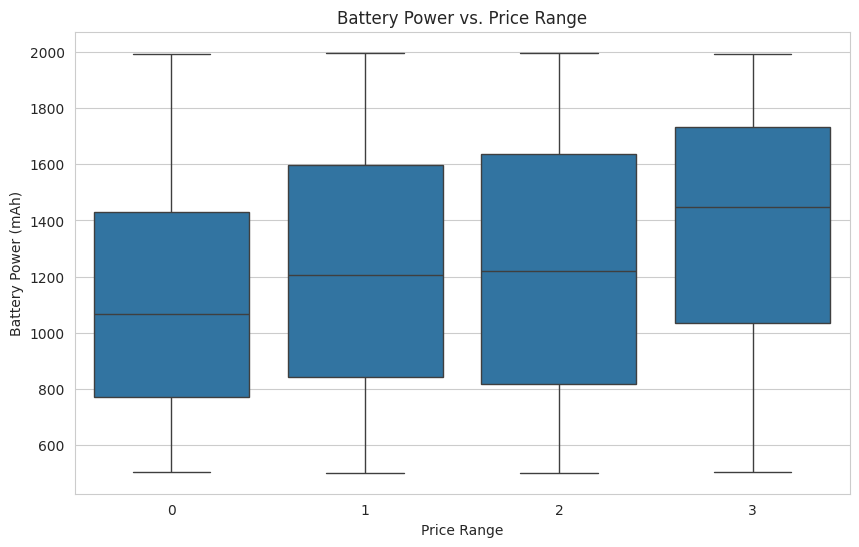

In [ ]:
# Analyze the relationship between battery_power and price range
plt.figure(figsize=(10, 6))
sns.boxplot(x='price_range', y='battery_power', data=train_df)
plt.title('Battery Power vs. Price Range')
plt.xlabel('Price Range')
plt.ylabel('Battery Power (mAh)')
plt.show()

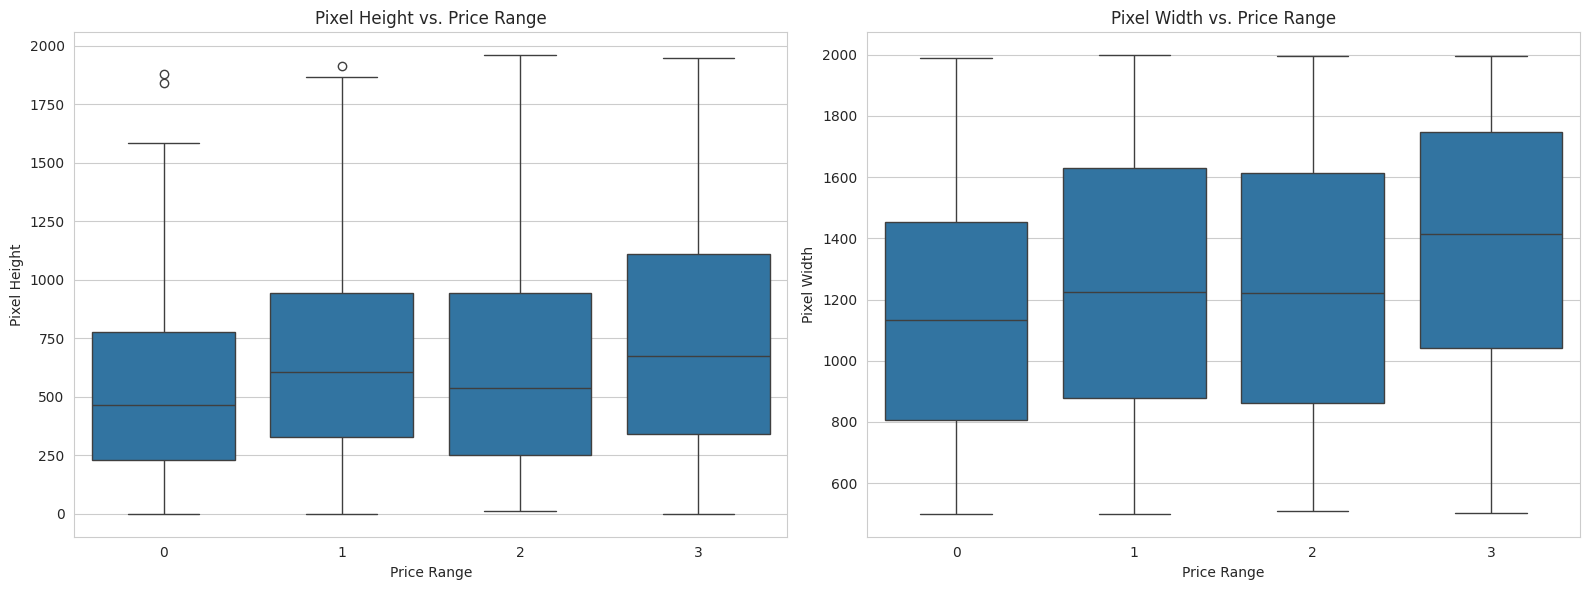

In [ ]:
# Analyze the relationship between px_height and px_width with price range
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.boxplot(x='price_range', y='px_height', data=train_df, ax=axes[0])
axes[0].set_title('Pixel Height vs. Price Range')
axes[0].set_xlabel('Price Range')
axes[0].set_ylabel('Pixel Height')

sns.boxplot(x='price_range', y='px_width', data=train_df, ax=axes[1])
axes[1].set_title('Pixel Width vs. Price Range')
axes[1].set_xlabel('Price Range')
axes[1].set_ylabel('Pixel Width')

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split features (X) and target (y)
X = train_df.drop('price_range', axis=1)
y = train_df['price_range']

# Split training data into training and validation sets (optional, but good practice)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Select numerical features for scaling (excluding the target variable)
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and validation data
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_val[numerical_features] = scaler.transform(X_val[numerical_features])

print("X_train shape:", X_train.shape)
print("X_val shape:", X_val.shape)
print("y_train shape:", y_train.shape)
print("y_val shape:", y_val.shape)

X_train shape: (1600, 20)
X_val shape: (400, 20)
y_train shape: (1600,)
y_val shape: (400,)


In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize and train the Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions on the validation set
y_pred = model.predict(X_val)

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred)
print(f"Accuracy: {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_val, y_pred))



Accuracy: 0.9750

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98       105
           1       0.94      1.00      0.97        91
           2       0.99      0.95      0.97        92
           3       0.97      0.99      0.98       112

    accuracy                           0.97       400
   macro avg       0.98      0.97      0.97       400
weighted avg       0.98      0.97      0.98       400



In [15]:
# Make predictions on the test set
X_test = test_df.drop('id', axis=1) # Drop the 'id' column from the test set
X_test[numerical_features] = scaler.transform(X_test[numerical_features]) # Scale the numerical features of the test set

test_predictions = model.predict(X_test)

# You can now use these predictions for submission or further analysis
print("Predictions on the test set:")
print(test_predictions)

Predictions on the test set:
[3 3 2 3 1 3 3 1 3 0 3 3 0 0 2 0 2 1 3 2 1 3 1 1 3 0 2 0 3 0 2 0 3 0 1 1 3
 1 2 1 1 2 0 0 0 1 0 3 1 2 1 0 3 0 3 1 3 1 1 3 3 3 0 1 0 1 2 3 1 2 1 2 2 3
 3 0 2 0 1 3 0 3 3 0 3 0 3 1 3 0 1 2 2 1 2 2 0 2 1 2 1 0 0 3 0 2 0 1 2 3 3
 3 1 3 3 3 3 2 3 0 0 3 2 1 2 0 3 2 2 2 0 2 2 1 3 1 1 0 3 2 1 2 1 3 2 3 3 3
 2 3 2 3 1 0 3 2 3 3 3 3 3 2 3 3 3 3 1 0 3 0 0 0 2 1 0 1 0 0 1 2 1 0 0 1 1
 2 2 1 0 0 0 1 0 3 1 0 2 2 2 3 1 2 3 3 3 2 2 1 1 0 1 2 0 2 3 3 0 2 0 3 2 3
 3 1 0 1 0 3 0 1 0 2 2 1 3 1 3 0 3 1 2 0 0 2 1 3 3 3 1 1 3 0 0 2 3 3 1 3 1
 1 3 2 1 2 3 3 3 1 0 1 2 3 1 1 3 2 0 3 0 1 2 1 0 3 2 3 3 2 1 3 3 2 3 1 2 1
 2 0 2 3 1 0 0 3 0 3 0 1 2 0 2 3 1 3 2 2 1 2 0 0 0 1 3 2 0 0 0 3 2 0 2 3 1
 2 2 2 3 1 3 3 2 2 2 3 3 0 3 0 3 1 3 1 2 3 0 1 0 3 1 3 2 3 0 0 0 0 2 0 0 2
 2 1 2 2 2 0 1 0 0 3 2 0 3 1 2 2 1 2 3 1 1 2 2 1 2 0 1 1 0 3 2 1 0 1 0 0 1
 1 0 0 0 2 2 3 2 3 0 3 0 3 0 1 1 0 2 0 3 2 3 3 1 3 1 3 1 3 2 0 1 2 1 1 0 0
 0 1 2 1 0 3 2 0 2 2 0 0 3 1 2 0 2 3 3 0 3 0 2 3 2 3 0 2 0 2 2 0 1 1 0 

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Initialize the models
dt_model = DecisionTreeClassifier(random_state=42)
rf_model = RandomForestClassifier(random_state=42)
svm_model = SVC(random_state=42)
knn_model = KNeighborsClassifier()

# Train the models
print("Training Decision Tree...")
dt_model.fit(X_train, y_train)
print("Decision Tree trained.")

print("\nTraining Random Forest...")
rf_model.fit(X_train, y_train)
print("Random Forest trained.")

print("\nTraining SVM...")
svm_model.fit(X_train, y_train)
print("SVM trained.")

print("\nTraining KNN...")
knn_model.fit(X_train, y_train)
print("KNN trained.")

Training Decision Tree...
Decision Tree trained.

Training Random Forest...
Random Forest trained.

Training SVM...
SVM trained.

Training KNN...
KNN trained.


In [17]:
# Evaluate the models on the validation set
print("Evaluating Decision Tree...")
dt_accuracy = accuracy_score(y_val, dt_model.predict(X_val))
print(f"Decision Tree Accuracy: {dt_accuracy:.4f}")

print("\nEvaluating Random Forest...")
rf_accuracy = accuracy_score(y_val, rf_model.predict(X_val))
print(f"Random Forest Accuracy: {rf_accuracy:.4f}")

print("\nEvaluating SVM...")
svm_accuracy = accuracy_score(y_val, svm_model.predict(X_val))
print(f"SVM Accuracy: {svm_accuracy:.4f}")

print("\nEvaluating KNN...")
knn_accuracy = accuracy_score(y_val, knn_model.predict(X_val))
print(f"KNN Accuracy: {knn_accuracy:.4f}")

Evaluating Decision Tree...
Decision Tree Accuracy: 0.8350

Evaluating Random Forest...
Random Forest Accuracy: 0.8925

Evaluating SVM...
SVM Accuracy: 0.8925

Evaluating KNN...
KNN Accuracy: 0.5300
